#**Credit Card Customer Churn**

### Analysis by Tanya Paray

A manager at the Metro Bank is disturbed with more and more customers leaving their credit card services.  This analysis will look to see if there's a way to predict which customers will churn.  The goal is to proactively go to the customer and provide better services so they won't leave.

This dataset consists of 10000 customers.

## Initial imports, data exploration and formula(s)

- Imported modules and libraries needed
- Imported the csv data, created DataFrame
- Looked at the number of rows, columns and datatypes
- Checked for null and Nan values
- Looked at unique values needed for hypotheses
- Created additional column as numeric value to utilize t-test on Education Level hypothesis
- Defined formula to return 95% confidence intervals

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set_style("white")
import pandas as pd
from scipy import stats
import numpy as np
import math


df = pd.read_csv('https://raw.githubusercontent.com/tanyaparay/Capstone_3/main/BankChurners.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
# looking at different unique values 
df['Months_Inactive_12_mon'].value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

In [5]:
# Checking all types of education levels
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [6]:
# Creating additional column for Education Level where the value is a number
# in order to be able to utilize t-tests.
df['Education_Num'] = 0
df.loc[(df['Education_Level'] == 'Uneducated'), 'Education_Num'] = 1
df.loc[(df['Education_Level'] == 'High School'), 'Education_Num'] = 2
df.loc[(df['Education_Level'] == 'College'), 'Education_Num'] = 3
df.loc[(df['Education_Level'] == 'Graduate'), 'Education_Num'] = 4
df.loc[(df['Education_Level'] == 'Post-Graduate'), 'Education_Num'] = 5
df.loc[(df['Education_Level'] == 'Doctorate'), 'Education_Num'] = 6
# check to confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

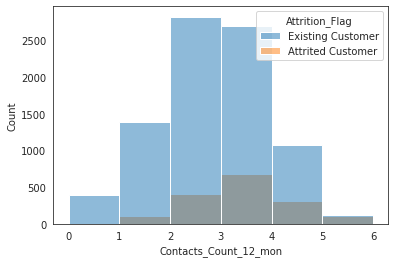

In [7]:
# Show the customer contacted count for the last 12 months
sns.histplot(x='Contacts_Count_12_mon', hue='Attrition_Flag', data=df, binwidth=1)

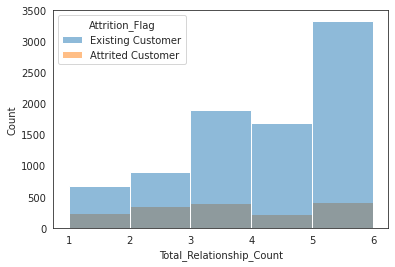

In [8]:
# Shows total accounts amongst customers
sns.histplot(x='Total_Relationship_Count', hue='Attrition_Flag', data=df, binwidth=1)

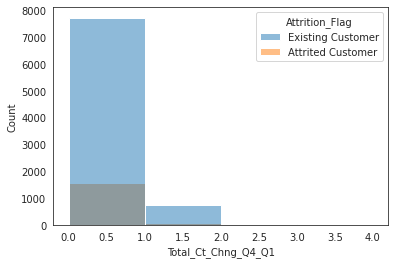

In [9]:
# Shows the difference in the count of transactions from Q4 to Q1
sns.histplot(x='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', data=df, binwidth=1)

In [10]:
# Defining Formula to calculate the confidence interval at 95%
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


### Attrition Flag

---



- There are 8500 Existing Customers and 1627 Attrited Customers in this dataset.  Hypotheses will be tested against these two variables.  
- Created two separate DataFrames for each variable.  
- Created another column to reference the Attrition_Flag column named Attrited_Quantitative, for quantitative analysis.

In [11]:
 # This shows total of existing or attrited customers
 customer_attrited_status = df['Attrition_Flag'].value_counts()
 print(customer_attrited_status)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


In [12]:
# Adding column to change categorical value - Existing Customer = 1, Attrited Customer = 0
df['Attrited_Quantitative'] = np.where(df['Attrition_Flag']!= 'Attrited Customer', 1, 0)

In [13]:
# Checking newly created column
df['Attrited_Quantitative'].tail()

10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrited_Quantitative, dtype: int64

In [14]:
# Creates smaller df to work with existing customers only
existing_customer_df = df[df['Attrition_Flag'] == 'Existing Customer']

In [15]:
# Creates smaller df to work with attrited customers only
attrited_customer_df = df[df['Attrition_Flag'] == 'Attrited Customer']

### Correlations

In [16]:
# Checking correlation between total acounts and the total contacts with customers
stats.pearsonr(df['Contacts_Count_12_mon'], df['Total_Relationship_Count'])

(0.055203163312505334, 2.716158588556051e-08)

In [17]:
# Checking the listed correlations
df[['Attrited_Quantitative', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']].corr()

,Attrited_Quantitative,Avg_Utilization_Ratio,Months_Inactive_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
Attrited_Quantitative,1.000000,0.178410,-0.152449,0.263053,0.000285,0.371403,0.290054
Avg_Utilization_Ratio,0.178410,1.000000,-0.007503,0.624022,-0.538808,0.002838,0.074143
Months_Inactive_12_mon,-0.152449,-0.007503,1.000000,-0.042210,-0.016605,-0.042787,-0.038989
Total_Revolving_Bal,0.263053,0.624022,-0.042210,1.000000,-0.047167,0.056060,0.089861
Avg_Open_To_Buy,0.000285,-0.538808,-0.016605,-0.047167,1.000000,0.070885,-0.010076
Total_Trans_Ct,0.371403,0.002838,-0.042787,0.056060,0.070885,1.000000,0.112324
Total_Ct_Chng_Q4_Q1,0.290054,0.074143,-0.038989,0.089861,-0.010076,0.112324,1.000000


In [18]:
# checking all correlations
df.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Education_Num,Attrited_Quantitative
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,-0.046411,0.046410,-0.006946,0.046430
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018189,-0.018189,-0.002369,-0.018203
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.019189,-0.019189,0.000472,-0.018991
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013693,-0.013694,0.006613,-0.013687
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.149981,0.149981,0.000766,0.150005
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.153452,-0.153452,0.005761,-0.152449
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.205772,-0.205772,-0.006280,-0.204491
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023853,0.023853,-0.002354,0.023873
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263033,0.263032,-0.006800,0.263053
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,-0.000267,0.000267,-0.001743,0.000285


# Hypothesis 1 - **Average Utilization Ratio**

---



Measures Average Card Utilization Ratio. (Amount of revolving credit you are currently using divided by the total amount of revolving credit you have available.)

*Does the Average Utilization Ratio show any insight to our Existing Customers vs Attrited Customers?*

1. **Visualizations (a, b)** - Using histogram and boxplot visualizations, the distribution shows Attrited customers have less avgerage utilization.
2. **Descriptive Statistics** - The stats are listed side by side to see the difference in the distribution range of the existing and attrited customers.
3. **T-test** - The p-value of the t-test is <.05, not within the 95% of being certain. The t-Stat is >1.96, above the t Crit further showing difference.
4. **Confidence Interval** - The 95% confidence interval does not include 0, suggesting the difference is not null.

From the statistical testing, we can conclude that there is a statistically significant difference of customers that have churned vs existing customers when measuring average utilizaton ratio.

Average Utilization Ratio Existing = 30%

Average Utilization Ratio Attrited = 16%

Median Utilization Ratio Existing = 21%

Median Utilization Ratio Attrited = 0


### Visualizations a and b

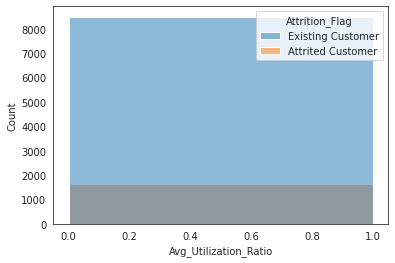

In [19]:
# 1. Visualization a
# Histogram to show distribution of Existing and Attrited Customers based on the 
# Average Utilization Ratio.
# plt.figure(figsize=(8,5))
sns.histplot(x='Avg_Utilization_Ratio', hue='Attrition_Flag', data=df, binwidth=1)

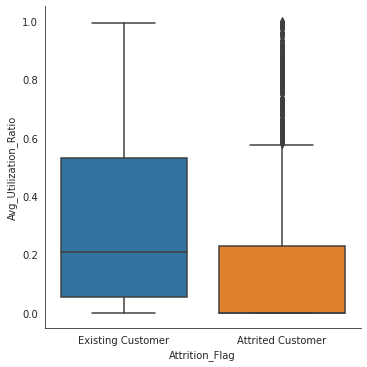

In [20]:
# 1. Visualization b
# Boxplot to also show distribution of Existing and Attrited Customers based on the 
# number of Average Utilization Ratio.
sns.catplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', kind='box', data=df)

### Descriptive Statistics

In [21]:
# 2. Descriptive Stats
# Side by Side descriptive stats of Existing and Attrited customers
# based on Average Utilization Ratio
Avg_Utilization_E = existing_customer_df['Avg_Utilization_Ratio']
Avg_Utilization_A = attrited_customer_df['Avg_Utilization_Ratio']

pd.merge(Avg_Utilization_E.describe(), Avg_Utilization_A.describe(), left_index=True, right_index=True, suffixes=('_E', '_A'))

,Avg_Utilization_Ratio_E,Avg_Utilization_Ratio_A
count,8500.000000,1627.000000
mean,0.296412,0.162475
std,0.272568,0.264458
min,0.000000,0.000000
25%,0.055000,0.000000
50%,0.211000,0.000000
75%,0.529250,0.231000
max,0.994000,0.999000


### T-test

In [22]:
# 3. T-test a
# Total Average Utilization Ratio column from both existing and attrited DataFrames
stats.ttest_ind(existing_customer_df['Avg_Utilization_Ratio'], attrited_customer_df['Avg_Utilization_Ratio'])

Ttest_indResult(statistic=18.244911490565563, pvalue=3.35768932824574e-73)

### Confidence Interval

In [23]:
# 4. Confidence Interval a
# Based on the Average Utilization Ratio
get_95_ci(existing_customer_df['Avg_Utilization_Ratio'],attrited_customer_df['Avg_Utilization_Ratio'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.14803315092875985 and -0.11984016336315222.'

# Hypothesis 2 - **Total Transaction Count**

---



Total Transaction Count - (Last 12 Months)

*Will the number of transactions show insight to Existing Customers vs Attrited Customers?*

1. **Visualizations (a, b)** - Using histogram and boxplot visualizations, the distribution shows Attrited customers have less total transactions.
2. **Descriptive Statistics** - The descriptive stats show that Attrited Customers have around 24 transactions less each year.
3. **T-test** - The p-value of the t-test is <.05, proving this is a statistically significant difference. The t-Stat is >1.96, above the t Crit further showing the difference is real.
4. **Confidence Interval** - The 95% confidence interval does not include 0, suggesting the difference is not null.

From the statistical testing, we can conclude that there is a statistically significant difference of customers that have churned vs existing customers when Total Transaction Count.

We can start by reaching out to those that have 43 or less transactions.

### Visualizations a and b

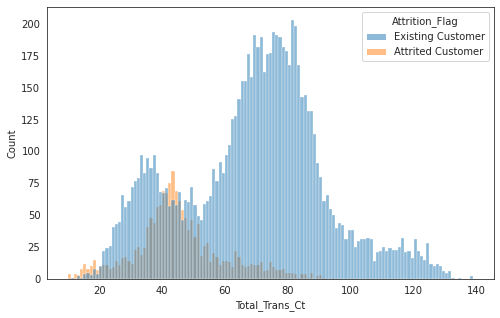

In [24]:
# 1. Visualization a
# Histogram to show distribution of Existing and Attrited Customers based on the 
# Total Transaction Count.
plt.figure(figsize=(8,5))
sns.histplot(x='Total_Trans_Ct', hue='Attrition_Flag', data=df, binwidth=1)

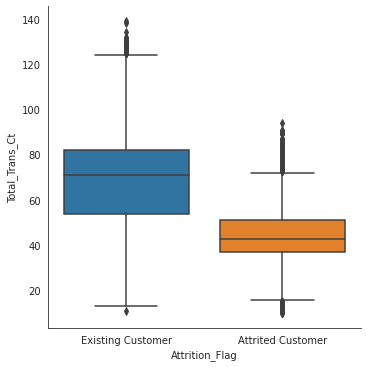

In [25]:
# 1. Visualization b
# Boxplot to also show distribution of Existing and Attrited Customers based on the 
# number of Total Transaction Count.
sns.catplot(x='Attrition_Flag', y='Total_Trans_Ct', kind='box', data=df)

### Descriptive Statistics

In [27]:
# 2. Descriptive Stats
# Side by Side descriptive stats of Existing and Attrited customers
# based on Total Transaction Count
Tot_Trans_Ct_E = existing_customer_df['Total_Trans_Ct']
Tot_Trans_Ct_A = attrited_customer_df['Total_Trans_Ct']

pd.merge(Tot_Trans_Ct_E.describe(), Tot_Trans_Ct_A.describe(), left_index=True, right_index=True, suffixes=('_E', '_A'))

,Total_Trans_Ct_E,Total_Trans_Ct_A
count,8500.000000,1627.000000
mean,68.672588,44.933620
std,22.919011,14.568429
min,11.000000,10.000000
25%,54.000000,37.000000
50%,71.000000,43.000000
75%,82.000000,51.000000
max,139.000000,94.000000


### T-tests a - h

In [28]:
# 3. T-test a
# Total Transaction Count column from both existing and attrited DataFrames
stats.ttest_ind(existing_customer_df['Total_Trans_Ct'], attrited_customer_df['Total_Trans_Ct'])

Ttest_indResult(statistic=40.250735299803345, pvalue=0.0)

### Confidence Interval

In [29]:
# 4. Confidence Interval a
# Based on the Total Transaction Count
get_95_ci(existing_customer_df['Total_Trans_Ct'],attrited_customer_df['Total_Trans_Ct'])

'The difference in means at the 95% confidence interval (two-tail) is between -24.59834687551021 and -22.879589275471382.'

# Hypothesis 3  - **Total Revolving Balance**

---



Measures total revolving balance on the credit card.

*Is there a difference in the Total Revolving Balance between Existing Customers and Attrited Customers?*

1. **Visualizations (a, b)** - Using histogram and boxplot visualizations, the distribution shows a difference between existing customers and attrited customers.
2. **Descriptive Statistics** - The stats are listed side by side to see the difference in the distribution range of the existing and attrited customers.
3. **T-test** - The p-value of the t-test is <.05, not within the 95% of being certain. The t-Stat is >1.96, above the t Crit further showing difference.
4. **Confidence Interval** - The 95% confidence interval does not include 0, suggesting the difference is not null.

From the statistical testing, we can conclude that there is a statistically significant difference of customers that have churned vs existing customers when measuring total revolving balance.

The evidence shows that the total revolving balance, on average, is less for attrited customers.

- Average Revolving Balance Existing 1256
- Average Revolving Balance Attrited 673


- Median Revolving Balance Existing 1364
- Median Revolving Balance Attrited 0


### Visualizations a and b

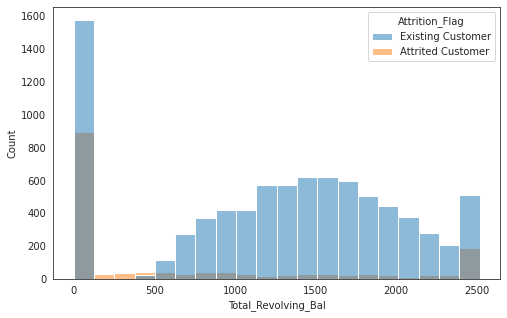

In [30]:
# 1. Visualization a
# Histogram to show distribution of Existing and Attrited Customers based on the 
# total revolving balance.
plt.figure(figsize=(8,5))
sns.histplot(x='Total_Revolving_Bal', hue='Attrition_Flag', data=df)

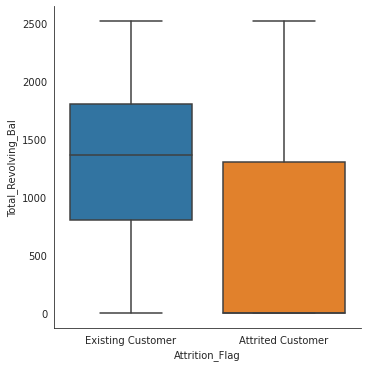

In [31]:
# 1. Visualization b
# Boxplot to also show distribution of Existing and Attrited Customers based on the 
# total revolving balance.
sns.catplot(x='Attrition_Flag', y='Total_Revolving_Bal', kind='box', data=df)

### Descriptive Statistics

In [32]:
# 2. Descriptive Stats
# Side by Side descriptive stats of Existing and Attrited customers
# based on the total revolving balance
revolve_bal_exist = existing_customer_df['Total_Revolving_Bal']
revolve_bal_attrite = attrited_customer_df['Total_Revolving_Bal']

pd.merge(revolve_bal_exist.describe(), revolve_bal_attrite.describe(), left_index=True, right_index=True, suffixes=('_E', '_A'))

,Total_Revolving_Bal_E,Total_Revolving_Bal_A
count,8500.000000,1627.000000
mean,1256.604118,672.822987
std,757.745354,921.385582
min,0.000000,0.000000
25%,800.000000,0.000000
50%,1364.000000,0.000000
75%,1807.000000,1303.500000
max,2517.000000,2517.000000


### T-test

In [33]:
# 3. T-test - Total_Revolving_Bal column from both existing and attrited DataFrames

stats.ttest_ind(existing_customer_df['Total_Revolving_Bal'], attrited_customer_df['Total_Revolving_Bal'])


Ttest_indResult(statistic=27.435422507845004, pvalue=6.630148455415696e-160)

### Confidence Interval

In [34]:
# 4. Confidence Interval
# Based on the Total Revolving Balance
get_95_ci(existing_customer_df['Total_Revolving_Bal'],attrited_customer_df['Total_Revolving_Bal'])

'The difference in means at the 95% confidence interval (two-tail) is between -631.3627203885754 and -536.1995407199244.'

# Hypothesis 4 - **Customer Age**

---



Measures customer age.

*Does Customer Age make a difference in existing or attrited customers?*

1. **Visualizations (a, b)** - Using histogram and boxplot visualizations, the distribution looks to be very similar between existing customers and attrited customers.
2. **Descriptive Statistics** - The stats are listed side by side to see the difference in the distribution range of the existing and attrited customers.
3. **T-tests (a-g)** - The p-value of the t-test is >.05, which would would be in the 95% range, and therefor not able to reject the null. The t-Stat is < 1.96, below the t Crit further proving we are unable to reject the null.
4. **Confidence Interval** - The 95% confidence interval does include 0.

From the statistical testing, we can conclude that there is NOT a statistically significant difference in age of customers that have churned vs existing customers. So, age is not a factor to consider.

### Visualizations a and b

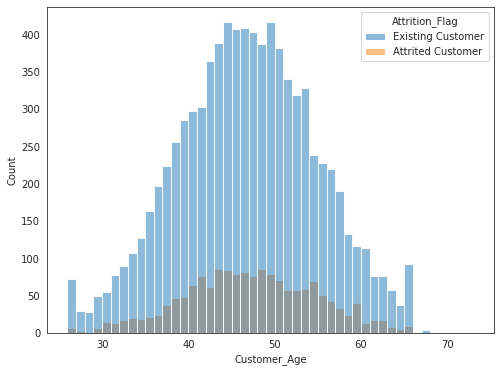

In [35]:
# 1. Visualization a
# Histogram to show distribution of Existing and Attrited Customers 
# based on the Customer Age.
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Customer_Age', hue='Attrition_Flag')

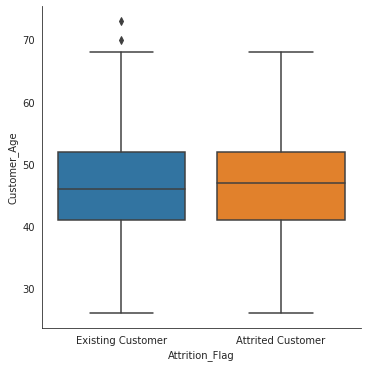

In [36]:
# 1. Visualization b
# Boxplot to also show distribution of Existing and Attrited Customers 
# based on the Customer Age.
# sns.boxplot(existing_customer_df['Customer_Age'])
sns.catplot(x='Attrition_Flag', y='Customer_Age', kind='box', data=df)

### Descriptive Statistics

In [37]:
# 2. Descriptive Stats
# Side by Side descriptive stats of Existing and Attrited customers
# based on the Customer age
Age_E = existing_customer_df['Customer_Age']
Age_A = attrited_customer_df['Customer_Age']

pd.merge(Age_E.describe(), Age_A.describe(), left_index=True, right_index=True, suffixes=('_E','_A'))

,Customer_Age_E,Customer_Age_A
count,8500.000000,1627.000000
mean,46.262118,46.659496
std,8.081157,7.665652
min,26.000000,26.000000
25%,41.000000,41.000000
50%,46.000000,47.000000
75%,52.000000,52.000000
max,73.000000,68.000000


### T-test

In [38]:
# 3. T-test - Customer_Age column from both existing and attrited DataFrames
stats.ttest_ind(existing_customer_df['Customer_Age'], attrited_customer_df['Customer_Age'])

Ttest_indResult(statistic=-1.8319590211710879, pvalue=0.06698688501759036)

### Confidence Interval

In [39]:
# 4. Confidence Interval
# Based on the Customer Age
get_95_ci(existing_customer_df['Customer_Age'],attrited_customer_df['Customer_Age'])


'The difference in means at the 95% confidence interval (two-tail) is between -0.012818614044829701 and 0.8075753297612327.'

# Hypothesis 5 - **Inactive Card**

---



Measures number of months inactive in the last 12 months.

*Is there a difference of Inactivity of the card with Existing Customers and Attrited Customers?*

1. **Visualizatons (a, b)** - Using histogram and boxplot visualizations, the distribution shows a difference with inactivity of the credit card between existing customers and attrited customers.
2. **Descriptive Statistics** - The stats are listed side by side to see the difference in the distribution range of the existing and attrited customers.
3. **T-tests (a-h)** - T tests were performed on all values of inactive months, including the total of all months. Months that are 0, 1, 3, 4 and the total of all test that there is a significant difference between Existing and Attrited Customers all with p-values <.05. Months 0, 1, 3, 4 and the total of all test with a t-Stat >1.96.
4. **Confidence Interval** - The 95% c.i. range does not include 0 for the months of 0, 1, 3 and 4 suggesting the difference is not null.

From the statistical testing, we can conclude that there is a statistically significant difference of customers that have churned vs existing customers.

Four months or less may flag a customer that will churn.

### Visualizations a and b

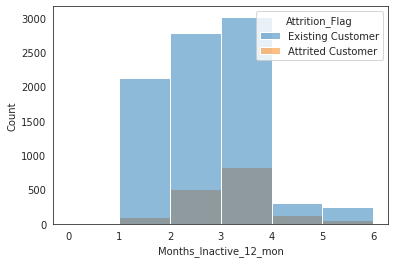

In [40]:
# 1. Visualization a
# Histogram to show distribution of Existing and Attrited Customers based on the 
# number of months inactive.
# plt.figure(figsize=(8,5))
sns.histplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', data=df, binwidth=1)

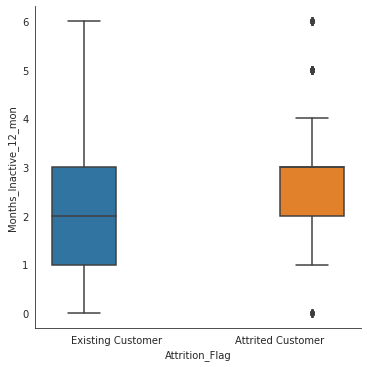

In [41]:
# 1. Visualization b
# Boxplot to also show distribution of Existing and Attrited Customers based on the 
# number of months inactive.
sns.catplot(x='Attrition_Flag', y='Months_Inactive_12_mon', kind='box', hue='Attrition_Flag', data=df)

### Descriptive Statistics

In [42]:
# 2. Descriptive Stats
# Side by Side descriptive stats of Existing and Attrited customers
# based on number of months inactive
Months_Inactive_E = existing_customer_df['Months_Inactive_12_mon']
Months_Inactive_A = attrited_customer_df['Months_Inactive_12_mon']

pd.merge(Months_Inactive_E.describe(), Months_Inactive_A.describe(), left_index=True, right_index=True, suffixes=('_E', '_A'))

,Months_Inactive_12_mon_E,Months_Inactive_12_mon_A
count,8500.000000,1627.000000
mean,2.273765,2.693301
std,1.016741,0.899623
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,3.000000
max,6.000000,6.000000


In [43]:
# Counts of each number of months inactive between Existing and Attrited 
pd.merge(Months_Inactive_E.value_counts(), Months_Inactive_A.value_counts(), left_index=True, right_index=True, suffixes=('_E', '_A'))

,Months_Inactive_12_mon_E,Months_Inactive_12_mon_A
3,3020,826
2,2777,505
1,2133,100
4,305,130
5,146,32
6,105,19
0,14,15


### T-tests a - h

In [44]:
# 3. T-test a
# Total Months_Inactive_12_mon column from both existing and attrited DataFrames
stats.ttest_ind(existing_customer_df['Months_Inactive_12_mon'], attrited_customer_df['Months_Inactive_12_mon'])

Ttest_indResult(statistic=-15.52128784291336, pvalue=1.0326639995929033e-53)

In [45]:
# 3. T-test b
# Ttest for 0 months inactive
stats.ttest_ind((existing_customer_df['Months_Inactive_12_mon'] == 0), (attrited_customer_df['Months_Inactive_12_mon'] == 0))

Ttest_indResult(statistic=-5.243295539940308, pvalue=1.609144102614876e-07)

In [46]:
# 3. T-test c
# Ttest for 1 month inactive
stats.ttest_ind((existing_customer_df['Months_Inactive_12_mon'] == 1), (attrited_customer_df['Months_Inactive_12_mon'] == 1))

Ttest_indResult(statistic=17.130562421470792, pvalue=7.172791309640573e-65)

In [47]:
# 3. T-test d
# Ttest for 2 months inactive
stats.ttest_ind((existing_customer_df['Months_Inactive_12_mon'] == 2), (attrited_customer_df['Months_Inactive_12_mon'] == 2))

Ttest_indResult(statistic=1.2884424087958766, pvalue=0.19762144514855806)

In [48]:
# 3. T-test e
# Ttest for 3 months inactive
stats.ttest_ind((existing_customer_df['Months_Inactive_12_mon'] == 3), (attrited_customer_df['Months_Inactive_12_mon'] == 3))

Ttest_indResult(statistic=-11.679945602547207, pvalue=2.5620667404162235e-31)

In [49]:
# 3. T-test f
# Ttest for 4 months inactive
stats.ttest_ind((existing_customer_df['Months_Inactive_12_mon'] == 4), (attrited_customer_df['Months_Inactive_12_mon'] == 4))

Ttest_indResult(statistic=-8.047801090006422, pvalue=9.37490540612047e-16)

In [50]:
# 3. T-test g
# Ttest for 5 months inactive
stats.ttest_ind((existing_customer_df['Months_Inactive_12_mon'] == 5), (attrited_customer_df['Months_Inactive_12_mon'] == 5))

Ttest_indResult(statistic=-0.7006403657026391, pvalue=0.48354358055757984)

In [51]:
# 3. T-test h
# Ttest for 6 months inactive
stats.ttest_ind((existing_customer_df['Months_Inactive_12_mon'] == 6), (attrited_customer_df['Months_Inactive_12_mon'] == 6))

Ttest_indResult(statistic=0.2267951302009512, pvalue=0.8205876291224456)

### Confidence Interval

In [52]:
# 4. Confidence Interval a
# Based on the total number of inactive months over the last 12 months
get_95_ci(existing_customer_df['Months_Inactive_12_mon'],attrited_customer_df['Months_Inactive_12_mon'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.3707696054980191 and 0.46830208906794535.'

In [53]:
# 4. Confidence Interval b
# Based on 0 inactive months
get_95_ci((existing_customer_df['Months_Inactive_12_mon'] == 0), (attrited_customer_df['Months_Inactive_12_mon'] == 0))

'The difference in means at the 95% confidence interval (two-tail) is between 0.00284750200449451 and 0.012297224847524726.'

In [54]:
# 4. Confidence Interval c
# Based on 1 inactive month
get_95_ci((existing_customer_df['Months_Inactive_12_mon'] == 1), (attrited_customer_df['Months_Inactive_12_mon'] == 1))

'The difference in means at the 95% confidence interval (two-tail) is between -0.20435286318037532 and -0.17460385976694742.'

In [55]:
# 4. Confidence Interval d
# Based on 2 inactive months
get_95_ci((existing_customer_df['Months_Inactive_12_mon'] == 2), (attrited_customer_df['Months_Inactive_12_mon'] == 2))

'The difference in means at the 95% confidence interval (two-tail) is between -0.04091818809437967 and 0.008280854857458587.'

In [56]:
# 4. Confidence Interval e
# Based on 3 inactive months
get_95_ci((existing_customer_df['Months_Inactive_12_mon'] == 3), (attrited_customer_df['Months_Inactive_12_mon'] == 3))

'The difference in means at the 95% confidence interval (two-tail) is between 0.1260439232384176 and 0.1787335452166964.'

In [57]:
# 4. Confidence Interval f
# Based on 4 inactive months
get_95_ci((existing_customer_df['Months_Inactive_12_mon'] == 4), (attrited_customer_df['Months_Inactive_12_mon'] == 4))

'The difference in means at the 95% confidence interval (two-tail) is between 0.030259590044194463 and 0.05777902306546243.'

In [58]:
# 4. Confidence Interval g
# Based on 5 inactive months
get_95_ci((existing_customer_df['Months_Inactive_12_mon'] == 5), (attrited_customer_df['Months_Inactive_12_mon'] == 5))

'The difference in means at the 95% confidence interval (two-tail) is between -0.004801145766152117 and 0.009784406187714718.'

In [59]:
# 4. Confidence Interval h
# Based on 6 inactive months
get_95_ci((existing_customer_df['Months_Inactive_12_mon'] == 6), (attrited_customer_df['Months_Inactive_12_mon'] == 6))

'The difference in means at the 95% confidence interval (two-tail) is between -0.006400633833596269 and 0.005050621179487299.'

# Hypothesis 6 - **Customer Education Level**

---



Customer education level is broken down into seven categories.  Unknown, Uneducated, High School, College, Graduate, Post-Graduate and Doctorate.

*Does Education Level make a difference in existing or attrited customers?*

1. **Visualizations (a, b)** - Used histogram to show the distribution between Existing and Attrited Customers based on the level of education.  On the boxplot, Customer Age and Education Level was used to show the distribution differece.
2. **Descriptive Stats** - The categorical stats are listed side by side to see the difference between Existing and Attrited Customers.
3. **T-tests** - Separate T-tests were used for each Education Level. The Doctorate was the only value that is significant at a p-value <.05 and a t-Stat < 1.96.
5. **Confidence Intervals** - The Doctorate was the only variable that did not include 0.

From the statistical testing, we can conclude that there is NOT a statistically significant difference in the education types of *Unknown, Uneducated, High School, College, Graduate and Post-Graduate.*  There IS a statistically significant difference if the education type is *Doctorate*.

### Visualizations a and b

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

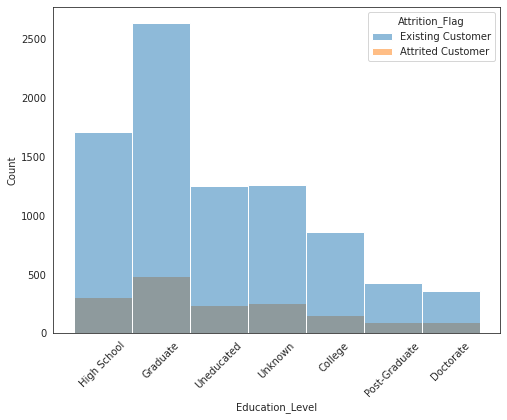

In [60]:
# 1. Visualization a
# Histogram to show distribution of Existing and Attrited Customers 
# based on Education Level.
plt.figure(figsize=(8,6))
ax = sns.histplot(data= df, x='Education_Level', hue='Attrition_Flag')

plt.setp(ax.get_xticklabels(), rotation=45)

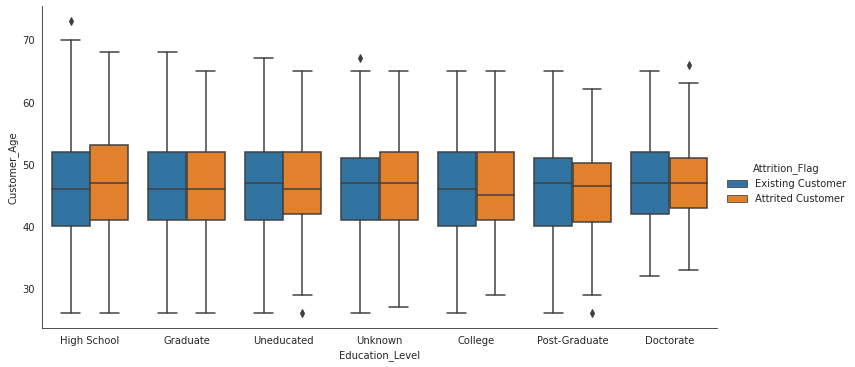

In [61]:
# 1. Visualization b
# Boxplot to also show distribution of Existing and Attrited Customers 
# based on the Education Level and Customer Age.
sns.catplot(x='Education_Level', y='Customer_Age', kind='box', hue='Attrition_Flag', data=df, aspect=2)

### Descriptive Statistics

In [62]:
# 2. Descriptive Stats
# Side by Side descriptive stats of Existing and Attrited customers
# based on the Education Level
Education_E = existing_customer_df['Education_Level']
Education_A = attrited_customer_df['Education_Level']

pd.merge(Education_E.describe(), Education_A.describe(), left_index=True, right_index=True, suffixes=('_E','_A'))

,Education_Level_E,Education_Level_A
count,8500,1627
unique,7,7
top,Graduate,Graduate
freq,2641,487


In [63]:
# This is a count of the Education Level of ALL customers 
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

### T-tests a - g

In [64]:
# 3. T-test a
# Ttest on Unknown Education Level only
stats.ttest_ind((existing_customer_df['Education_Num'] == 0), (attrited_customer_df['Education_Num'] == 0))

Ttest_indResult(statistic=-0.9061966002326154, pvalue=0.36485336640345833)

In [65]:
# 3. T-test b
# Ttest on Uneducated Education Level only
stats.ttest_ind((existing_customer_df['Education_Num'] == 1), (attrited_customer_df['Education_Num'] == 1))

Ttest_indResult(statistic=0.14531589057619013, pvalue=0.8844643615908072)

In [66]:
# 3. T-test c
# Ttest on High School Education Level only
stats.ttest_ind((existing_customer_df['Education_Num'] == 2), (attrited_customer_df['Education_Num'] == 2))

Ttest_indResult(statistic=1.180347758347886, pvalue=0.23788965954014388)

In [67]:
# 3. T-test d
# Ttest on College Education Level only
stats.ttest_ind((existing_customer_df['Education_Num'] == 3), (attrited_customer_df['Education_Num'] == 3))

Ttest_indResult(statistic=0.7889469451927945, pvalue=0.43016148880091987)

In [68]:
# 3. T-test e
# Ttest on Graduate Education Level only
stats.ttest_ind((existing_customer_df['Education_Num'] == 4), (attrited_customer_df['Education_Num'] == 4))

Ttest_indResult(statistic=0.9103003725343745, pvalue=0.362685791758512)

In [69]:
# 3. T-test f
# Ttest on Post Graduate Education Level only
stats.ttest_ind((existing_customer_df['Education_Num'] == 5), (attrited_customer_df['Education_Num'] == 5))

Ttest_indResult(statistic=-1.1197389643148528, pvalue=0.2628515767584671)

In [70]:
# 3. T-test g
# Ttest on Doctorate Education Level only
stats.ttest_ind((existing_customer_df['Education_Num'] == 6), (attrited_customer_df['Education_Num'] == 6))

Ttest_indResult(statistic=-2.9582083430875405, pvalue=0.003101483404149164)

### Confidence Intervals (a - g)

In [71]:
# 4. Confidence Interval a
# Based on Unknown Education Level only
get_95_ci((existing_customer_df['Education_Num'] == 0), (attrited_customer_df['Education_Num'] == 0))

'The difference in means at the 95% confidence interval (two-tail) is between -0.010490123069825729 and 0.028003265265855903.'

In [72]:
# 4. Confidence Interval b
# Based on Uneducated Education Level only
get_95_ci((existing_customer_df['Education_Num'] == 1), (attrited_customer_df['Education_Num'] == 1))

'The difference in means at the 95% confidence interval (two-tail) is between -0.020119422278606577 and 0.017335518305216343.'

In [73]:
# 4. Confidence Interval c
# Based on High School Education Level only
get_95_ci((existing_customer_df['Education_Num'] == 2), (attrited_customer_df['Education_Num'] == 2))

'The difference in means at the 95% confidence interval (two-tail) is between -0.03356371752214833 and 0.008069086479811319.'

In [74]:
# 5. Confidence Interval d
# Based on College Education Level only
get_95_ci((existing_customer_df['Education_Num'] == 3), (attrited_customer_df['Education_Num'] == 3))

'The difference in means at the 95% confidence interval (two-tail) is between -0.022011320259971934 and 0.009199143391683125.'

In [75]:
# 4. Confidence Interval e
# Based on Graduate Education Level only
get_95_ci((existing_customer_df['Education_Num'] == 4), (attrited_customer_df['Education_Num'] == 4))

'The difference in means at the 95% confidence interval (two-tail) is between -0.03571944882286231 and 0.012955502187047597.'

In [76]:
# 4. Confidence Interval f
# Based on Post Graduate Education Level only
get_95_ci((existing_customer_df['Education_Num'] == 5), (attrited_customer_df['Education_Num'] == 5))

'The difference in means at the 95% confidence interval (two-tail) is between -0.005480025386238839 and 0.01880689909823132.'

In [77]:
# 4. Confidence Interval g
# Based on Doctorate Education Level only
get_95_ci((existing_customer_df['Education_Num'] == 6), (attrited_customer_df['Education_Num'] == 6))

'The difference in means at the 95% confidence interval (two-tail) is between 0.0043403526868397435 and 0.028674289924968357.'

# Other Data Exploration

In [78]:
# sns.pairplot(data_df, hue='Attrition_Flag')

In [79]:
existing_customer_df[['Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Months_Inactive_12_mon']].describe()

,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Months_Inactive_12_mon
count,8500.000000,8500.000000,8500.000000,8500.000000
mean,8726.877518,4654.655882,68.672588,2.273765
std,9084.969807,3512.772635,22.919011,1.016741
min,1438.300000,816.000000,11.000000,0.000000
25%,2602.000000,2384.750000,54.000000,1.000000
50%,4643.500000,4100.000000,71.000000,2.000000
75%,11252.750000,4781.250000,82.000000,3.000000
max,34516.000000,18484.000000,139.000000,6.000000


In [80]:
attrited_customer_df[['Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Months_Inactive_12_mon']].describe()

,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Months_Inactive_12_mon
count,1627.000000,1627.000000,1627.000000,1627.000000
mean,8136.039459,3095.025814,44.933620,2.693301
std,9095.334105,2308.227629,14.568429,0.899623
min,1438.300000,510.000000,10.000000,0.000000
25%,2114.000000,1903.500000,37.000000,2.000000
50%,4178.000000,2329.000000,43.000000,3.000000
75%,9933.500000,2772.000000,51.000000,3.000000
max,34516.000000,10583.000000,94.000000,6.000000


In [81]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Education_Num,Attrited_Quantitative
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,2.601955,0.839340
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,1.700417,0.367235
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,1.000000,1.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,3.000000,1.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,4.000000,1.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,6.000000,1.000000
